# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#This dataset was attained online for free at:
#Source: https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset

#The dataset describes customer behavior on an online retail site and records 3 types of customer events with timestamps: Item views, addtocart, and purchases.
#Goal of this analysis is to determine understand how customers are using the site and what actions lead to more purchase.
data = pd.read_csv("events.csv")
df = pd.DataFrame(data)

#Display columns and data types to ground oneself in data.
display(df.columns)
df.info()

Index(['timestamp', 'visitorid', 'event', 'itemid', 'transactionid'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [2]:
#become familiar with range of data fields
df.describe()

,timestamp,visitorid,itemid,transactionid
count,2.756101e+06,2.756101e+06,2.756101e+06,22457.000000
mean,1.436424e+12,7.019229e+05,2.349225e+05,8826.497796
std,3.366312e+09,4.056875e+05,1.341954e+05,5098.996290
min,1.430622e+12,0.000000e+00,3.000000e+00,0.000000
25%,1.433478e+12,3.505660e+05,1.181200e+05,4411.000000
50%,1.436453e+12,7.020600e+05,2.360670e+05,8813.000000
75%,1.439225e+12,1.053437e+06,3.507150e+05,13224.000000
max,1.442545e+12,1.407579e+06,4.668670e+05,17671.000000


In [3]:
#Clean the data by modifying timestamp field.

#Timestamp field is shown in epoch time (seconds since 1/1/1970) and it hard to for humans to interpret
#Clean data by adding Datetime from 'timestamp' to allow for manipulation

df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
df

,timestamp,visitorid,event,itemid,transactionid,date
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106
...,...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN,2015-08-01 03:13:05.939
2756097,1438399813142,762376,view,115946,NaN,2015-08-01 03:30:13.142
2756098,1438397820527,1251746,view,78144,NaN,2015-08-01 02:57:00.527
2756099,1438398530703,1184451,view,283392,NaN,2015-08-01 03:08:50.703


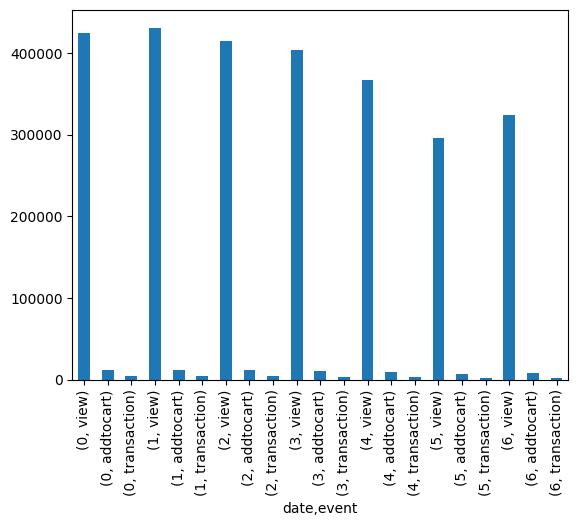

In [4]:
#Examine Site Events throughout the Week.

#Group by weekday from new datetime column and count each visitor event.
grouped_by_day = df.groupby(df['date'].dt.weekday)['event'].value_counts()

#plot a bar chart to show how visitor behavior changes throughout the week.
grouped_by_day.plot(kind = 'bar')
plt.show()

#plot below shows customer events reach a low on the weekends. 

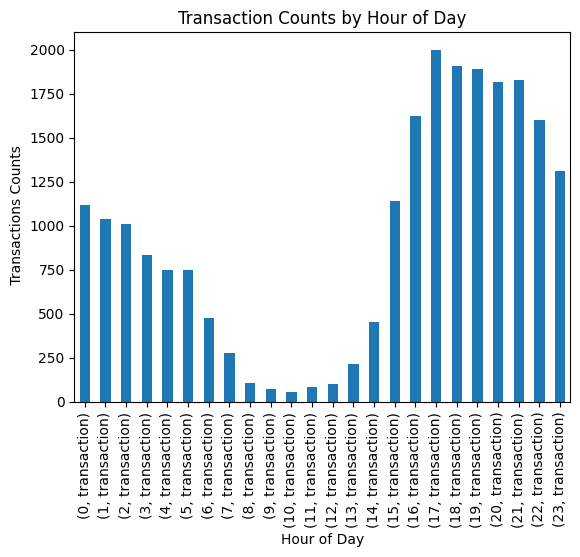

In [5]:
#Examine Transactions throughout the Day

#Narrow the DF down to only transaction Event
transaction_df = df[df['event']=='transaction']

# Group by hour of day and count transactions.
grouped_by_hour = transaction_df.groupby(transaction_df['date'].dt.hour)['event'].value_counts()

#plot a bar chart to show how visitor behavior changes throughout the day.
grouped_by_hour.plot(kind = 'bar', width = .5)
plt.ylabel(' Transactions Counts')
plt.xlabel('Hour of Day')
plt.title('Transaction Counts by Hour of Day')
plt.show()

#visitor behavior peaks around Hour 17 (5PM) and reaches a low around Hour 10 (10AM). Visitors must be in a different time zone.
#Research indicated online shopping trends should reach lows at 3am and highs around 1pm or 2pm. 
#These users are likely in a pacific time zone. Perhaps East Asia, Austrailia, or Hawaii


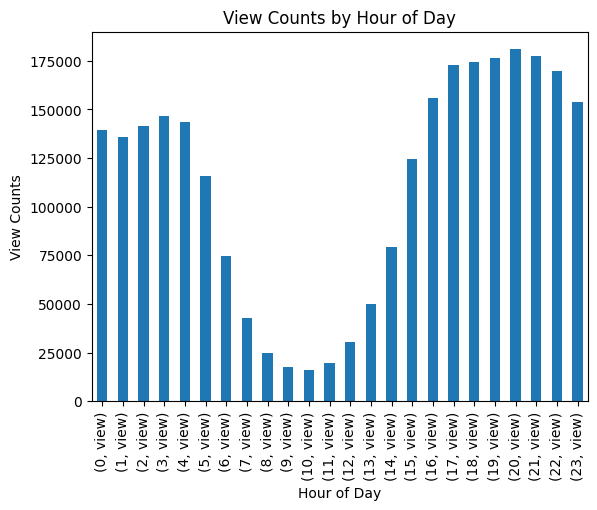

In [6]:
#Examine Views throughout the Day.

#Narrow the DF down to show only view events
view_df = df[df['event']=='view']

#groupby hour of day and count each event.
grouped_by_hour = view_df.groupby(view_df['date'].dt.hour)['event'].value_counts()

#plot a bar chart to show how visitor behavior changes throughout the day.
grouped_by_hour.plot(kind = 'bar', width = .5)
plt.ylabel('View Counts')
plt.xlabel('Hour of Day')
plt.title('View Counts by Hour of Day')
plt.show()

#the chart below shows how views remain more constant in the evening while the chart above shows how transaction fall off in the evening.

In [7]:
# I want to rank items by count of Views, count of Add to Cart, and Transaction Events
#the Goal is to find which Items are popular purchases and which Items attract attention.

#create new dataframe that counts each item by views:
item_views = df[(df['event'] == 'view')]['itemid'].value_counts().reset_index()
item_views.columns = ['itemid', 'item_views']
#new dataframe that counts each item by transaction:
item_transactions = df[(df['event'] == 'transaction')]['itemid'].value_counts().reset_index()
item_transactions.columns = ['itemid', 'item_purchases']
#new dataframe that counts each item by addtocarts:   
item_addtocarts = df[(df['event'] =='addtocart')]['itemid'].value_counts().reset_index()
item_addtocarts.columns = ['itemid','item_adds']

#join these new dfs with the merge function to compare directly
items_df = pd.merge(item_transactions, item_views, on='itemid', how='left')
items_df = pd.merge(items_df, item_addtocarts, on='itemid', how='left')

#Here's our list of items showing counts of each customer behavior: purchases, views, and add to cart events
#I'll sort by item_views to show off the most clicked on items on the website.
items_df = items_df.sort_values(['item_views'], ascending=[False])
items_df.head(10)

#Table below shows how top viewed items aren't always top purchased items!!!

,itemid,item_purchases,item_views,item_adds
0,461686,133,2539.0,306.0
71,219512,12,1740.0,48.0
45,309778,15,1565.0,48.0
18,257040,27,1531.0,89.0
43,384302,15,1528.0,65.0
105,111530,11,1397.0,39.0
82,441668,11,1389.0,33.0
3,7943,46,1346.0,97.0
11,320130,33,1333.0,141.0
38,234255,16,1214.0,77.0


In [8]:
#I'm going to add fields to the items_df in order to plot relationships between customer behaviors events:
#High Ratios here indicate power customers and low ratios indicate uncertain customers. 

#Purchases / Views
items_df['purchase_view_ratio']=(items_df['item_purchases']/items_df['item_views'])
#Adds / Purchases
items_df['add_purchase_ratio'] = (items_df['item_adds']/items_df['item_purchases'])
#Add / Views
items_df['add_view_ratio'] = (items_df['item_adds']/items_df['item_views'])

#Examine the table by descending order of purchase to view ratio 
items_df = items_df.sort_values(['purchase_view_ratio'], ascending=[ False])
items_df.head(10)

,itemid,item_purchases,item_views,item_adds,purchase_view_ratio,add_purchase_ratio,add_view_ratio
593,28789,5,2.0,NaN,2.500000,NaN,NaN
263,132633,7,3.0,NaN,2.333333,NaN,NaN
4131,192003,2,1.0,5.0,2.000000,2.5,5.0
2211,1510,2,1.0,4.0,2.000000,2.0,4.0
2224,111436,2,1.0,4.0,2.000000,2.0,4.0
9349,274731,1,1.0,1.0,1.000000,1.0,1.0
5201,442610,1,1.0,NaN,1.000000,NaN,NaN
11532,90660,1,1.0,NaN,1.000000,NaN,NaN
5352,389950,1,1.0,2.0,1.000000,2.0,2.0
7525,72462,1,1.0,NaN,1.000000,NaN,NaN


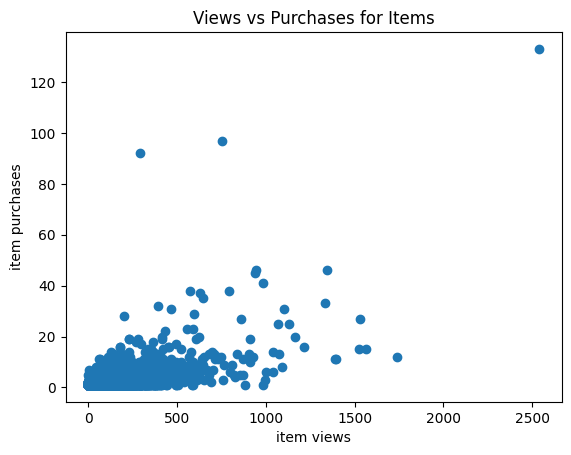

In [9]:
#Here I plot Views Vs. Purchases

#There's a general, albeit somewhat weak relationship between item views and buys
#There's also 3 outlier items that are purchased more than others.
plt.scatter(items_df['item_views'], items_df['item_purchases'])

plt.xlabel("item views")
plt.ylabel("item purchases")
plt.title("Views vs Purchases for Items")

plt.show()

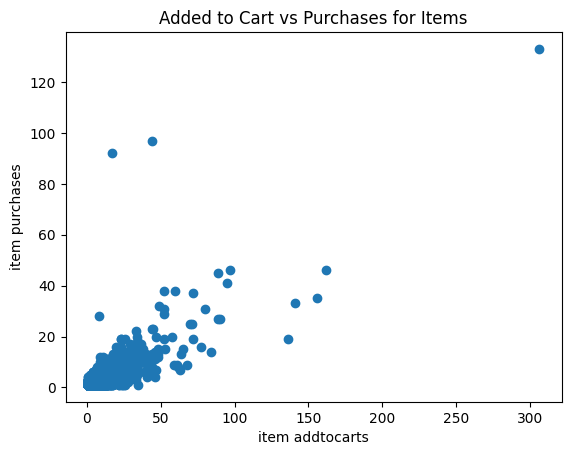

In [10]:

#There's a much stronger correlation between items being purchased and added to carts.
plt.scatter(items_df['item_adds'], items_df['item_purchases'])

plt.xlabel("item addtocarts")
plt.ylabel("item purchases")
plt.title("Added to Cart vs Purchases for Items")
plt.show()

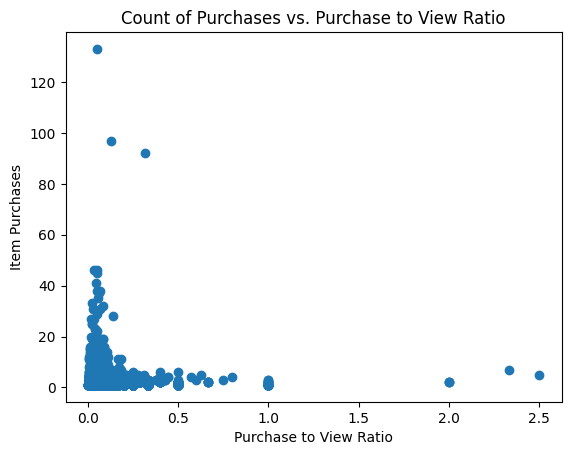

In [11]:
#plotting purchase to view ratio below shows us there many items with high views and low transactions, and other items with 
plt.scatter(items_df['purchase_view_ratio'], items_df['item_purchases'])

plt.xlabel("Purchase to View Ratio")
plt.ylabel("Item Purchases")
plt.title("Count of Purchases vs. Purchase to View Ratio")
plt.show()

In [12]:
# Now I want to look at the same 3 events (purchases, adds, views) but this time group by visitors id.
# The goal is to see how individual users use the website idenpendant of the item.

#Using the code from above to count each visitors views
visitor_views = df[(df['event'] == 'view')]['visitorid'].value_counts().reset_index()
visitor_views.columns = ['visitorid', 'visitor_views']
#Count of visitors transaction
visitor_purchases = df[(df['event'] == 'transaction')]['visitorid'].value_counts().reset_index()
visitor_purchases.columns = ['visitorid', 'visitor_purchases']
#Count of visitors add to carts
visitor_adds = df[(df['event'] =='addtocart')]['visitorid'].value_counts().reset_index()
visitor_adds.columns = ['visitorid','visitor_adds']

#merge these new df to compare side by side in new df
visitor_df = pd.merge(visitor_purchases, visitor_views, on='visitorid', how='left')
visitor_df = pd.merge(visitor_df, visitor_adds, on='visitorid', how='left')

#Add ratios: high purchase to view ratio is a power user
visitor_df['purchase_view_ratio']=(visitor_df['visitor_purchases']/visitor_df['visitor_views'])
#Add to cart ratio indicates decisive users
visitor_df['add_purchase_ratio'] = (visitor_df['visitor_adds']/visitor_df['visitor_purchases'])
#Add to view ratio indicates active users
visitor_df['add_view_ratio'] = (visitor_df['visitor_adds']/visitor_df['visitor_views'])

#Narrow the search to only users that have at least 1 purchase
visitor_df = visitor_df[visitor_df['visitor_purchases']>1]
visitor_df = visitor_df.sort_values(['visitor_purchases'], ascending=[ False])
visitor_df

#The table below shows top visitors by purchases. You can see theses users have high view to purchases ratios as well.
#Out of 100,000 total users only 2576 have ever purchased an item.

,visitorid,visitor_purchases,visitor_views,visitor_adds,purchase_view_ratio,add_purchase_ratio,add_view_ratio
0,1150086,559,6479.0,719.0,0.086279,1.286225,0.110974
1,152963,349,2304.0,371.0,0.151476,1.063037,0.161024
2,530559,286,3623.0,419.0,0.078940,1.465035,0.115650
3,684514,189,1826.0,231.0,0.103505,1.222222,0.126506
4,861299,188,1573.0,230.0,0.119517,1.223404,0.146217
...,...,...,...,...,...,...,...
1028,750986,2,12.0,3.0,0.166667,1.500000,0.250000
1027,1281446,2,10.0,1.0,0.200000,0.500000,0.100000
2575,102019,2,6.0,1.0,0.333333,0.500000,0.166667
2574,189384,2,25.0,2.0,0.080000,1.000000,0.080000


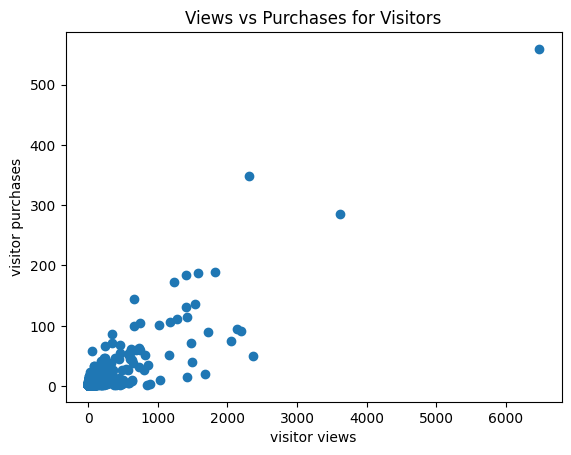

In [13]:
#Let's look at the same scatter plot above, this time for visitors instead of items.
plt.scatter(visitor_df['visitor_views'], visitor_df['visitor_purchases'])

plt.xlabel("visitor views")
plt.ylabel("visitor purchases")
plt.title("Views vs Purchases for Visitors")

plt.show()

#compare this scatter to the first scatter above(Views Vs Purchases for Items). Both have a positive correlation (as expected)
#the correlation for Views and Purchases is much stronger for visitors than for items.


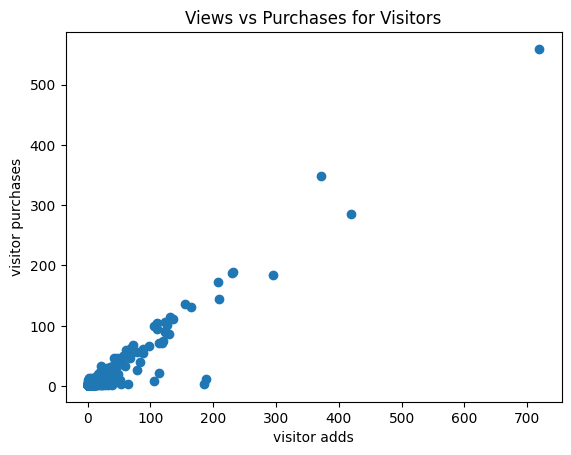

In [14]:
plt.scatter(visitor_df['visitor_adds'], visitor_df['visitor_purchases'])

plt.xlabel("visitor adds")
plt.ylabel("visitor purchases")
plt.title("Views vs Purchases for Visitors")

plt.show()

#Below you can see the relationship for adding an item to a cart is a much better predictor of a purchase for any given user than for any given item.
#Visitor behavior is more predictable than item performance. This indicates the marketplace has a large range of items (practical and easy to sell vs unpractical and just for show)


Text(0.5, 0, 'Number of Views')

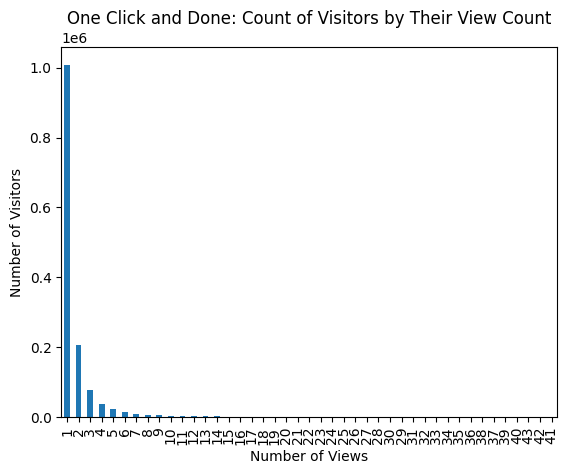

In [15]:
#How does the average user use the Site? Do they click around a lot or only once?

#Here I count the number of users by the number of their views.
user_views = view_df.groupby('visitorid')['event'].value_counts()

view_count = user_views.value_counts()
view_count = view_count[view_count.values > 60]
view_count.plot(kind = 'bar')
plt.title("One Click and Done: Count of Visitors by Their View Count")
plt.ylabel('Number of Visitors')
plt.xlabel('Number of Views')

#The majority of site visitors (100,000 visitors!) view 1 item and leave.

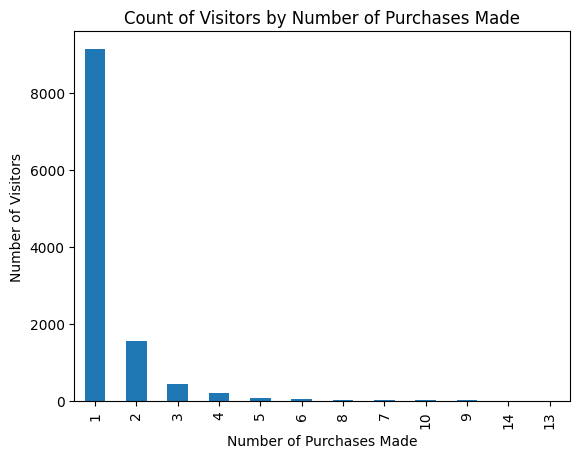

In [16]:
#How does the average user use the Site? Do they buy a lot or only once?

#Here I count the number of users by the number of their purchases.
user_transactions = transaction_df.groupby('visitorid')['event'].value_counts()

#restrict search to less than 10 purchases for plot fitting.
count = user_transactions.value_counts()
count = count[count.values > 10]
count.plot(kind = 'bar')
plt.title("Count of Visitors by Number of Purchases Made")
plt.ylabel('Number of Visitors')
plt.xlabel('Number of Purchases Made')
plt.show()

# The majority of users that make a purchase (over 8,000 visitors) only buy one item!

In [17]:
#Any missed oppurtunities? Identify users that view the site but do not purchase anything.
# Let's calculate what percentage of site viewers are item buyers.

#count site visitors
user_count = df['visitorid'].nunique()
#count buyers
buyer_count = transaction_df['visitorid'].nunique()

percent_of_buyers = (buyer_count / user_count) *100

print("Only about",  round(percent_of_buyers,2),"percent of visitors buy an item. Thats",  buyer_count, "buyers out of",  user_count , "site visitors!")

Only about 0.83 percent of visitors buy an item. Thats 11719 buyers out of 1407580 site visitors!


## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? I'm surprised by how skewed some statistics in the dataset can be. Most activity coming from very few visitors and most visitors doing very little.

2. Do you have any concerns about your dataset? My biggest concern is the dataset is too large to be handled by Tableau. Also some outliers may be errors, depending on how the website collects information. For example, some items have more purchases than add to carts. This might be possible with a buy it now feature. 

3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? It is necessary to convert timestamp epoch time to datetime for usability. 